Ridge Regression L2 (pytourch)

In [23]:
import torch

# step 1: data (dummy binary dataset)
torch.manual_seed(2)
x = torch.randn(100, 2)   # 100 samples, 2 features
true_w = torch.tensor([[2.0], [-3.0]])
true_b = 1.0
logit = x @ true_w + true_b
prob = torch.sigmoid(logit)
y = (prob > 0.5).float()

# step 2: model params
w = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lamda = 0.1  # regularization factor
lr = 0.1     # learning rate

# step 3: training loop
for i in range(200):
    z = x @ w + b
    y_pred = torch.sigmoid(z)

    # binary cross entropy loss
    bce = -torch.mean(y * torch.log(y_pred + 1e-8) + (1 - y) * torch.log(1 - y_pred + 1e-8))

    # ridge penalty
    l2 = torch.sum(w ** 2)

    # total loss
    loss = bce + lamda * l2

    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    w.grad.zero_()
    b.grad.zero_()

    if (i+1) % 20 == 0:
        print("step:", i+1, "loss:", loss.item())

print("final w:", w.view(-1).tolist(), "final b:", b.item())


step: 20 loss: 0.5423532724380493
step: 40 loss: 0.5050768256187439
step: 60 loss: 0.49683576822280884
step: 80 loss: 0.4947548508644104
step: 100 loss: 0.49415990710258484
step: 120 loss: 0.49396687746047974
step: 140 loss: 0.4938965141773224
step: 160 loss: 0.4938683807849884
step: 180 loss: 0.4938564598560333
step: 200 loss: 0.4938512146472931
final w: [0.5344494581222534, -0.8235309720039368] final b: 0.44652214646339417


Ridge regression L2 (sciket-learn)

In [24]:
from sklearn.linear_model import Ridge
import numpy as np

# dummy data
X = np.random.randn(100, 1)
y = 3*X.squeeze() + 2 + 0.2*np.random.randn(100)

# model with L2 regularization
model = Ridge(alpha=0)  # alpha jo hy wohe lamda hou ga
model.fit(X, y)

print("coef:", model.coef_)
print("intercept:", model.intercept_)


coef: [2.9603016]
intercept: 1.9761037723540926


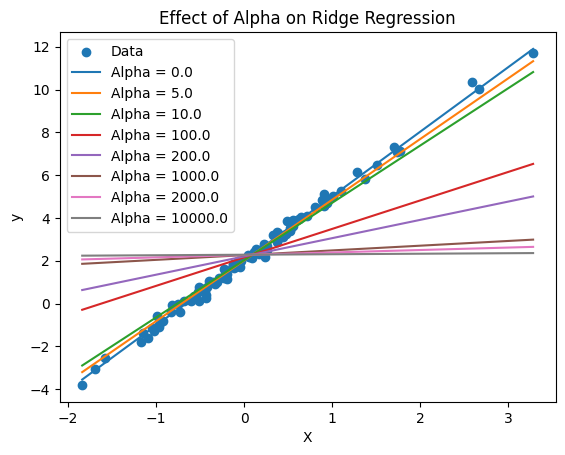

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

# dummy data (using the same data generation as before)
X = np.random.randn(100, 1)
y = 3*X.squeeze() + 2 + 0.2*np.random.randn(100)


# Plot the data
plt.scatter(X, y, label='Data')

# Define different alpha values to test
alpha_values = [0, 5, 10, 100,200,1000,2000,10000]

# Fit and plot Ridge models for each alpha value
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    # Generate points for the fitted line
    x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, label=f'Alpha = {alpha:.1f}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Effect of Alpha on Ridge Regression')
plt.legend()
plt.show()

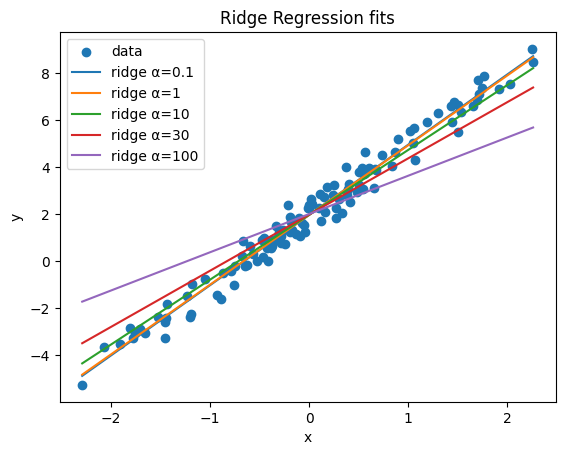

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# ------------------ Part A: Scatter with Ridge & Lasso ------------------
np.random.seed(7)
x = np.random.randn(120, 1)
y = 3 * x.squeeze() + 2 + 0.5 * np.random.randn(120)

xplot = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
alpha_list = [0.1, 1, 10, 30, 100]

# Ridge scatter
plt.figure()
plt.scatter(x, y, label="data")
for a in alpha_list:
    m = Ridge(alpha=a)
    m.fit(x, y)
    yline = m.predict(xplot)
    plt.plot(xplot, yline, label=f"ridge α={a}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ridge Regression fits")
plt.legend()
plt.show()



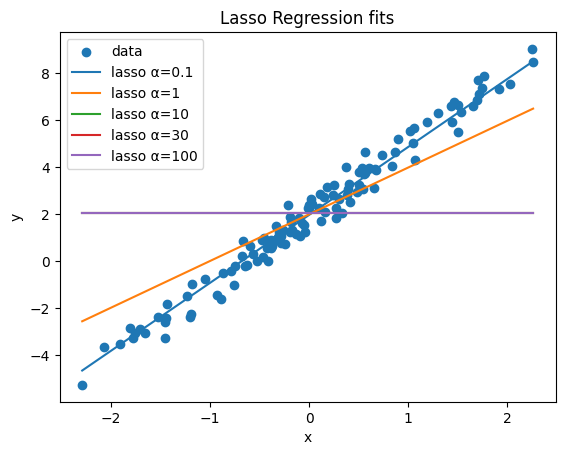

In [27]:

# Lasso scatter
plt.figure()
plt.scatter(x, y, label="data")
for a in alpha_list:
    m = Lasso(alpha=a, max_iter=10000)
    m.fit(x, y)
    yline = m.predict(xplot)
    plt.plot(xplot, yline, label=f"lasso α={a}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lasso Regression fits")
plt.legend()
plt.show()



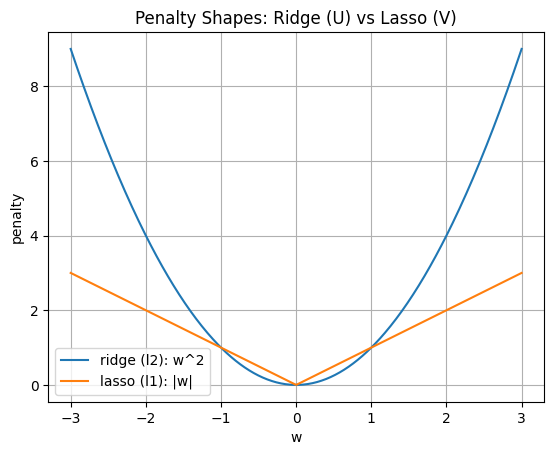

In [28]:
# ------------------ Part B: Penalty Shapes (U vs V) ------------------
w = np.linspace(-3, 3, 400)
l2 = w**2          # ridge penalty
l1 = np.abs(w)     # lasso penalty

plt.figure()
plt.plot(w, l2, label="ridge (l2): w^2")
plt.plot(w, l1, label="lasso (l1): |w|")
plt.title("Penalty Shapes: Ridge (U) vs Lasso (V)")
plt.xlabel("w")
plt.ylabel("penalty")
plt.legend()
plt.grid(True)
plt.show()




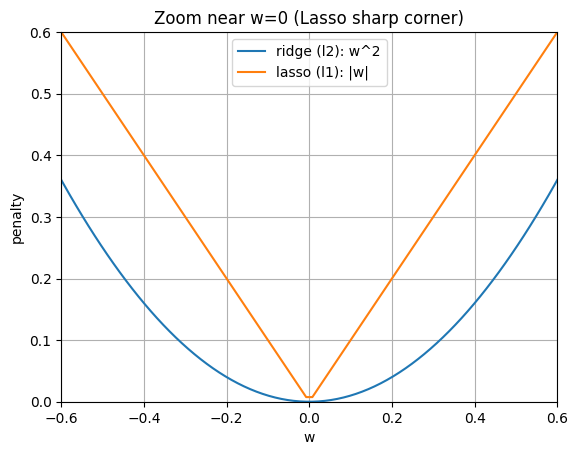

In [29]:
# zoom near zero
plt.figure()
plt.plot(w, l2, label="ridge (l2): w^2")
plt.plot(w, l1, label="lasso (l1): |w|")
plt.xlim(-0.6, 0.6)
plt.ylim(0, 0.6)
plt.title("Zoom near w=0 (Lasso sharp corner)")
plt.xlabel("w")
plt.ylabel("penalty")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [31]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Linear regression

In [36]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.4399338661568968


Ridge

In [33]:
reg = Ridge(alpha=0.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.45199494197195456


lasso

In [34]:
reg = Lasso(alpha=0.01)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))


0.44111855963110613


In [35]:
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.4531474541554823
